In [130]:
function [h] = sigmoid(z)
    h = 1./(1+ e.^-z);
end

In [131]:
function [X, Y, n] = syntheticWMTLC(t, m, d, p, s, alpha, alpha_w, polarity_noise,p_sparse, fpath)
%     d = 1 % dimensionality
%     m = 100 % instances per task
%     t = 5 % number of tasks
    
    n = 0 % total number of instances (calculated )
    %alpha=1000 % max magnitude for tasks' features
    %alpha_w=100 % magnitude for the weightss
    
    % polarity for the features
    if p == 1 % enforce
        polarity = randn(d, 1);
        polarity = sign(polarity)
        pfunc = @(W) abs(W) .* polarity;
    else % random
        pfunc = @(W) (W); 
    endif
    
    % magnitude
    if s == 1 
        % integers features
        magnitudeFunc = @() randi(alpha) ;
        xgen = @() randi([-5,5], m, d); 
        dataset_type = 'sparse'
    else
        % real features
        magnitudeFunc = @() rand() * alpha ;
        xgen = @() randn(m, d) * alpha ; 
        dataset_type = 'continuous'
    endif
    
    % data generation
    for i=1:t
        X{i} = xgen() ; #+ magnitudeFunc();
        
        if p_sparse > 0
            X{i}(rand(size(X{i}))> 1-p_sparse) = 0;            
            %X{i} = sparse(X{i});
        end
        
        
        % weight noise
        w_polarity_noise = rand(d,1); 
        w_polarity_noise(w_polarity_noise > polarity_noise) = 1;
        w_polarity_noise(w_polarity_noise <= polarity_noise) = -1;
        W{i} = pfunc(randn(d,1)*alpha_w) .* w_polarity_noise;       
        
        if p_sparse > 0
            W{i}(rand(d,1)> 1-p_sparse) = 0;    
            %W{i} = sparse(W{i});
        end
                    
        noise{i} = randn(m, 1)*0.1;
        Y{i} = (sigmoid(X{i}*W{i} + noise{i}) > 0.5)*1;
        n = n + m;
    end
    
    
    % save data
    num_tasks = t;
    num_features = d;
    num_instances = n;
    
    save(
        '-V7', 
        fpath, 
        'X', 
        'Y',
        'W',
        'noise',
        'num_tasks', 
        'num_features',
        'num_instances',
        'dataset_type'        
    );
end

In [132]:
rand(5,1)

ans =

   0.86202
   0.70648
   0.51201
   0.25234
   0.59989



In [133]:
%t=5; m=200; d=1; p=1; s=0;
%t=5; m=100; d=1; p=0; s=1;
%t=5; m=100; d=1; p=0; s=0; alpha=10, alpha_w=10;
%t=20; m=100; d=25; p=0; s=0;
t=5; m=100; d=25; p=1; s=0; alpha=1, alpha_w=0.9, polarity_noise=0.05, p_sparse=0;
fpath = '../data/syntheticWMTLC8';
fpath = [fpath 't' num2str(t) ];
fpath = [fpath 'm' num2str(m) ];
fpath = [fpath 'd' num2str(d) ];
fpath = [fpath 'p' num2str(p) ];
fpath = [fpath 's' num2str(s) ];
fpath = [fpath 'sp' num2str(int32(p_sparse*100))];
fpath = [fpath '.mat' ]
[X, Y] = syntheticWMTLC(t, m, d, p, s, alpha, alpha_w,polarity_noise, p_sparse, fpath);

alpha =  1
alpha_w =  0.90000
polarity_noise =  0.050000
fpath = ../data/syntheticWMTLC8t5m100d25p1s0sp0.mat
n = 0
polarity =

   1
  -1
   1
   1
   1
   1
  -1
   1
  -1
   1
  -1
  -1
   1
   1
   1
  -1
   1
   1
   1
   1
   1
   1
  -1
   1
  -1

dataset_type = continuous


In [134]:
clear;
load ../data/syntheticWMTLC8t5m100d25p1s0sp0.mat
T=num_tasks
whos

T =  5
Variables in the current scope:

   Attr Name               Size                     Bytes  Class
   ==== ====               ====                     =====  ===== 
        T                  1x1                          8  double
        W                  1x5                       1000  cell
        X                  1x5                     100000  cell
        Y                  1x5                       4000  cell
        dataset_type       1x10                        10  char
        noise              1x5                       4000  cell
        num_features       1x1                          8  double
        num_instances      1x1                          8  double
        num_tasks          1x1                          8  double

Total is 34 elements using 109042 bytes



In [135]:
w = cell2mat(W)

w =

   1.202791   0.564346   0.535385   0.859698   1.563157
  -1.248381  -0.679736  -0.666029  -1.256291  -1.654260
   0.927009   0.988538   0.949663   0.686622   0.394112
   1.463493   0.757856   0.132760  -0.363225   1.061457
   1.672706   1.132724   0.412346   0.099855   0.483756
   0.434999   1.273109   0.478112   1.340905   0.225587
  -0.064449  -0.822250  -1.453570  -0.355060  -1.011096
   0.703715   1.170957   0.487448   0.928083   1.176019
  -1.936282  -1.085387  -0.015715  -1.211171  -1.173036
   1.789036   1.116963   1.833482   2.342120   0.516279
  -0.527350   0.924965  -0.939164  -0.659861  -1.161627
  -0.845719  -0.854097  -0.399141  -0.150133  -0.875490
   0.336926   0.944181   0.979832   1.177905   0.682746
   0.790141   0.725330   1.153247   0.815458   1.997258
   0.066165   0.361040   1.649830  -1.061982   0.324976
  -0.577302  -0.553301   0.526262  -1.087051  -0.034932
   2.233018   0.059924   1.225646  -0.158287   1.811869
   2.061013   0.343112   0.469440   0.85951

In [136]:

for i=1:T
    labelsdist(i,:) = histc(Y{i}, unique(Y{i}));
end

%labelsdist

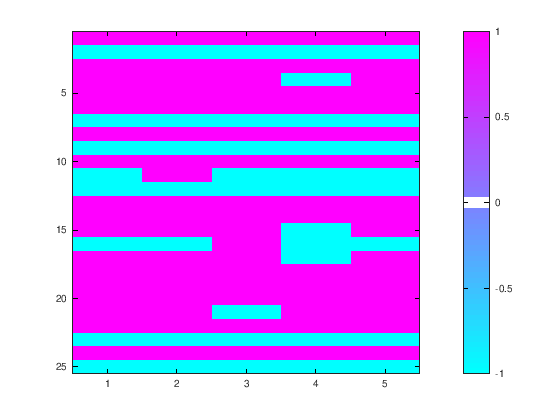

In [137]:
%cmap = colormap ();
%colormap('cool');
cmap =colormap('cool');
cmap(32, :) = [1 1 1];
cmap(33, :) = [1 1 1];
%colormap(cmap)
%cmap
colormap(cmap);
ws = sign(w);
imagesc (ws);
colorbar ();
#imshow(W)

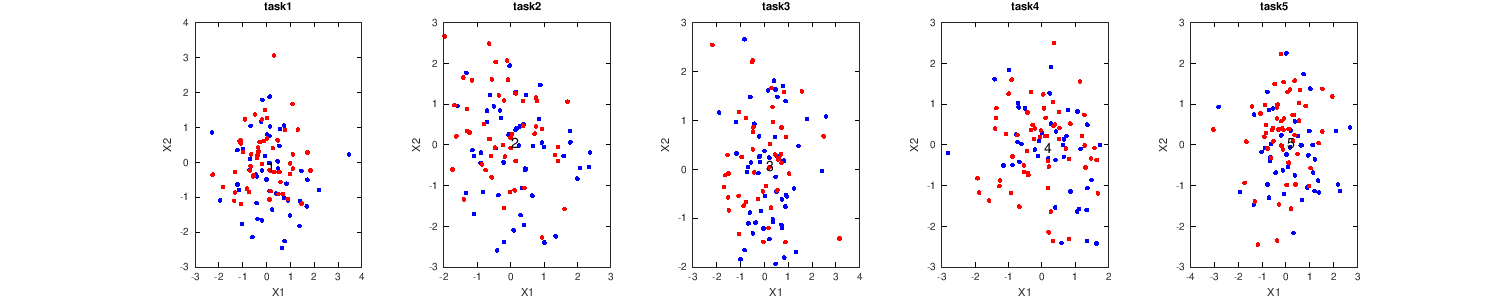

In [138]:
figure(1, 'position',[0,0,1500,300]);
    
for i=1:T
    subplot(1, T, i)
    ix_pos = Y{i} == 1;
    plot(X{i}(ix_pos,1), X{i}(ix_pos,2), '.', 'markersize', 10, 'color', 'b')
    title(['task' num2str(i)])
    xlabel('X1')
    ylabel('X2')  
    hold on;
    ix_pos = Y{i} == 0;
    plot(X{i}(ix_pos,1), X{i}(ix_pos,2), '.', 'markersize', 10, 'color', 'r')
    xlabel('X1')
    ylabel('X2')  
    text(mean(X{i}(:,1)), mean(X{i}(:,2)), num2str(i), 'fontsize', 14)
end